**Corner Detector**

In [ ]:
# path input gammbar
inputimg = './img/saya.jpeg'

C:\Users\yefta\AppData\Local\Temp\ipykernel_17176\3370711174.py:12: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


Jumlah titik terdeteksi =  477


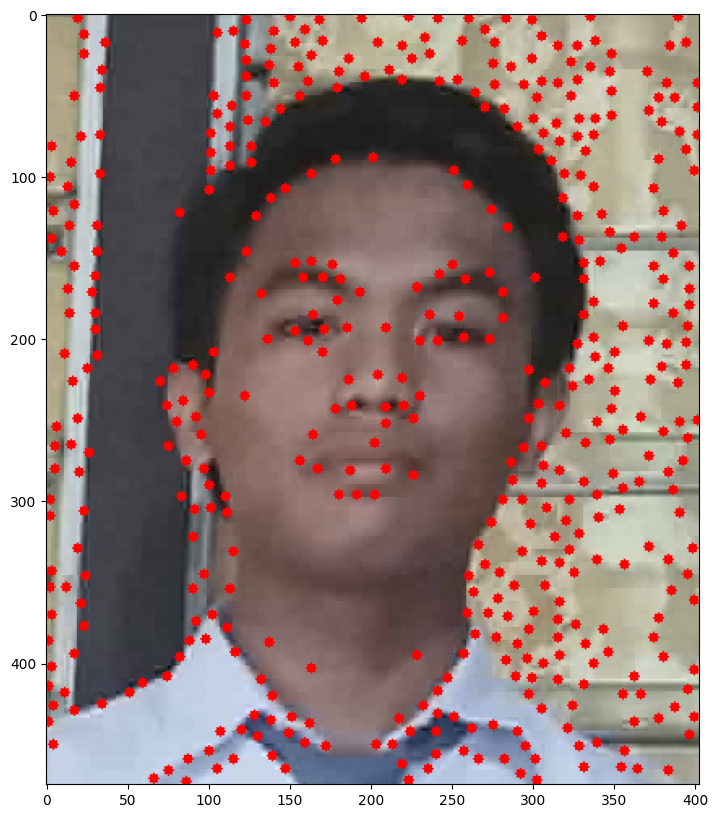

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

# load gambar yang tersimpan di Google Colab
img = cv2.imread(inputimg)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# deteksi pojok dengan GFFTT
corners = cv2.goodFeaturesToTrack(gray, 1000, 0.01, 10)
corners = np.int0(corners)

# menampilkan jumlah titik terdeteksi dengan fungsi numpy (np.ndarray.shape)
print("Jumlah titik terdeteksi = ", corners.shape[0])

# untuk ditampilkan di Matplotlib, urutan band dibalik
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (20, 20)

# untuk tiap pojok yang terdeteksi, munculkan pada gambar
for i in corners:
    x, y = i.ravel()
    cv2.circle(rgb, (x, y), 3, 255, -1)

plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.show()


**Menggunakan KAZE**

Jumlah titik terdeteksi =  332


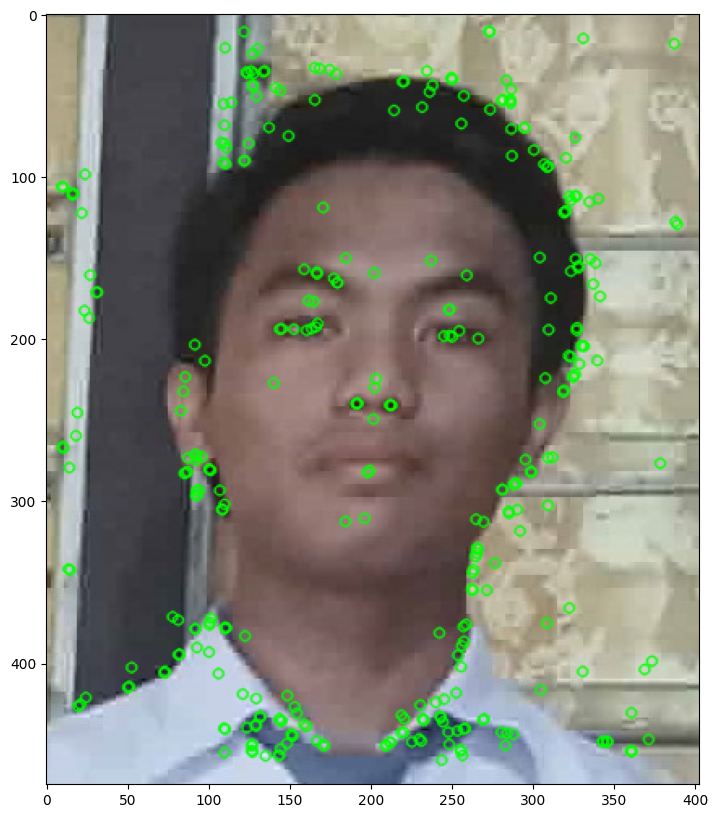

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# memanggil gambar berwarna
img = cv2.imread(inputimg)

# cara lain memanggil grayscale dari gambar
#img = cv2.imread('./img/Lenna.png', 0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# mendefinisikan KAZE descriptor
kaze = cv2.KAZE_create()
kp = kaze.detect(gray)

# compute descriptors vector
kp, dsc = kaze.compute(gray, kp)

# berapa titik yang terdeteksi?
print('Jumlah titik terdeteksi = ', len(kp))

# menggambar keypoint yang berhasil diindentifikasi
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.drawKeypoints(img_rgb, kp, None, color=(0, 255, 0), flags=0)
plt.figure(figsize=(10, 10))
plt.imshow(img2)
plt.show()

**Menggunakan ORB**

Jumlah titik terdeteksi =  486


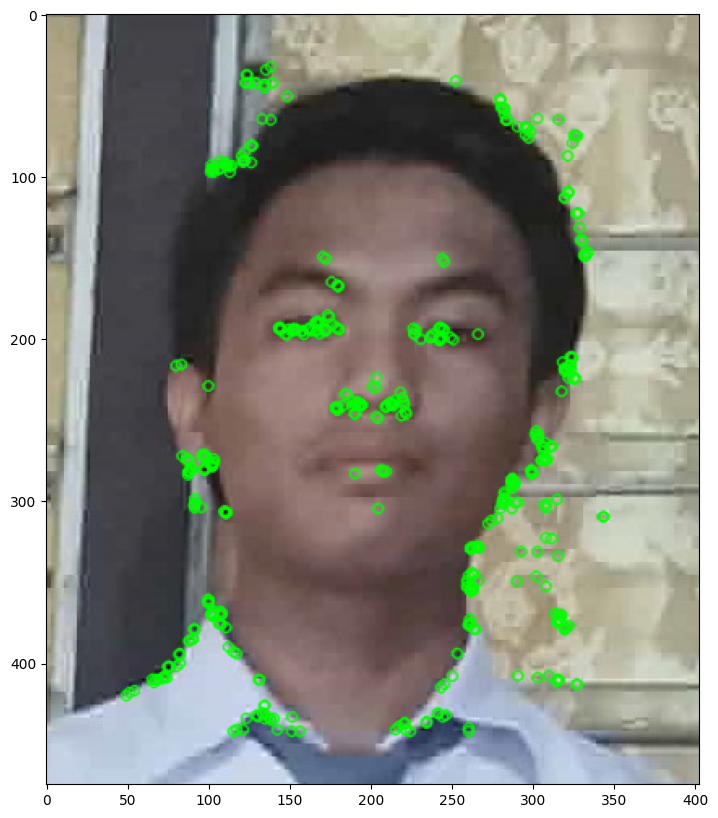

(<matplotlib.image.AxesImage at 0x240d5662360>, None)

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# membaca citra
img = cv2.imread(inputimg, 0)

# membuat ORB detector
orb = cv2.ORB_create()

# kp: variabel untuk menyimpan keypoint yang berahasil terdeteksi
kp = orb.detect(img, None)

# menghitung descriptor
# kp = keypoints
# des = descriptor
kp, des = orb.compute(img, kp)

# berapa jumlah titik terdeteksi?
print("Jumlah titik terdeteksi = ", len(kp))

# menggambar keypoint yang berhasil diindentifikasi
img2 = cv2.drawKeypoints(img_rgb, kp, None, color=(0, 255, 0), flags=0) # img_rgb dari variabel sebelumnya di atas
plt.figure(figsize=(10, 10))
plt.imshow(img2), plt.show()

**Menggunakan SIFT**

Jumlah titik terdeteksi =  391


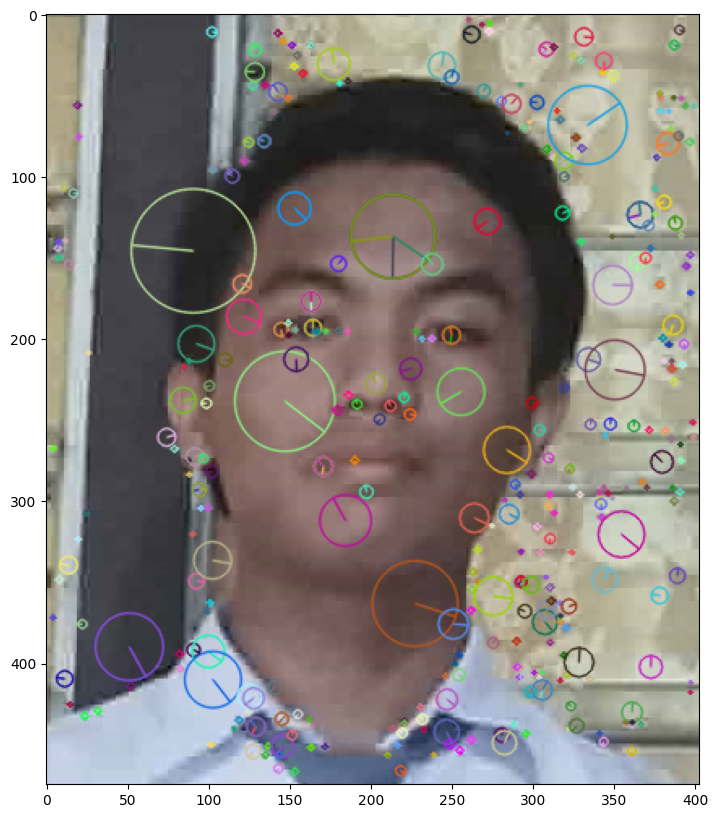

(<matplotlib.image.AxesImage at 0x240bc9ddf10>, None)

In [ ]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(inputimg)
#konversi ke warna abu2 agar menjadi satu band
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# menghitung fitur dengan SIFT
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

# berapa jumlah titik terdeteksi?
print("Jumlah titik terdeteksi = ", len(kp))

# perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (20, 20)

# menggambar keypoint yang berhasil diindentifikasi
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img3 = cv2.drawKeypoints(img_rgb, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 10))
plt.imshow(img3), plt.show()

**Menggunakan SURF**

In [ ]:
# import cv2
# from matplotlib import pyplot as plt

# img = cv2.imread(inputimg)
# #konversi ke warna abu2 agar menjadi satu band
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # menghitung fitur dengan SIFT
# sift = cv2..SURF_create(400)
# kp = sift.detect(gray, None)

# # berapa jumlah titik terdeteksi?
# print("Jumlah titik terdeteksi = ", len(kp))

# # perbesar ukuran hasil plotting
# plt.rcParams["figure.figsize"] = (20, 20)

# # menggambar keypoint yang berhasil diindentifikasi
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img3 = cv2.drawKeypoints(img_rgb, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# plt.figure(figsize=(10, 10))
# plt.imshow(img3), plt.show()

**Feature Detection**

In [ ]:
family = './img/keluarga.jpeg'
saya = './img/saya.jpeg'
# Daftar path gambar yang akan diproses
daftar_gambar = ['./img/saya.jpeg', './img/papa.jpeg', './img/mama.jpeg']

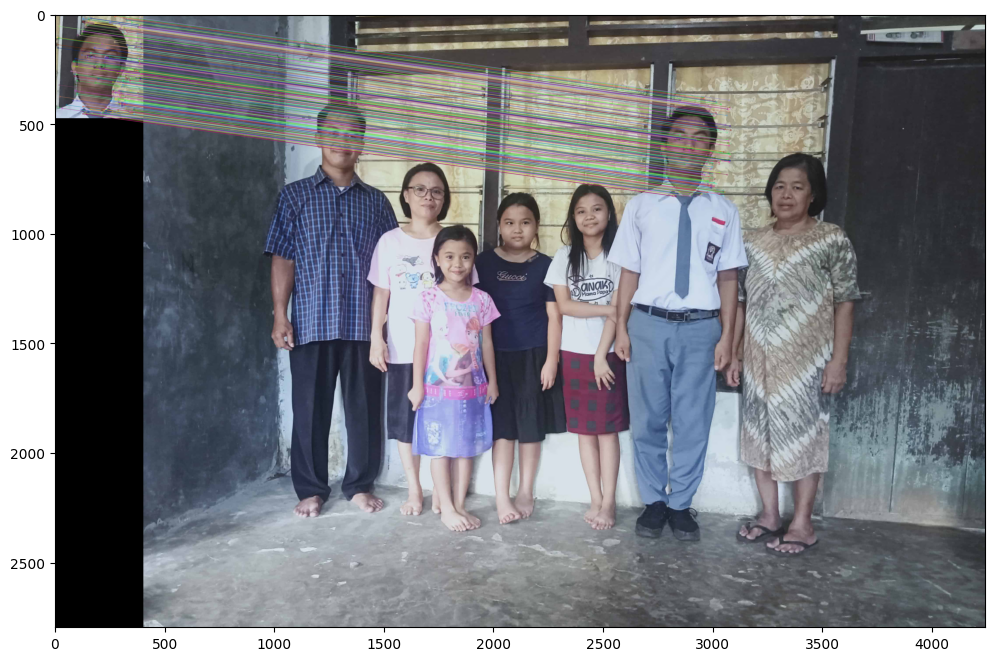

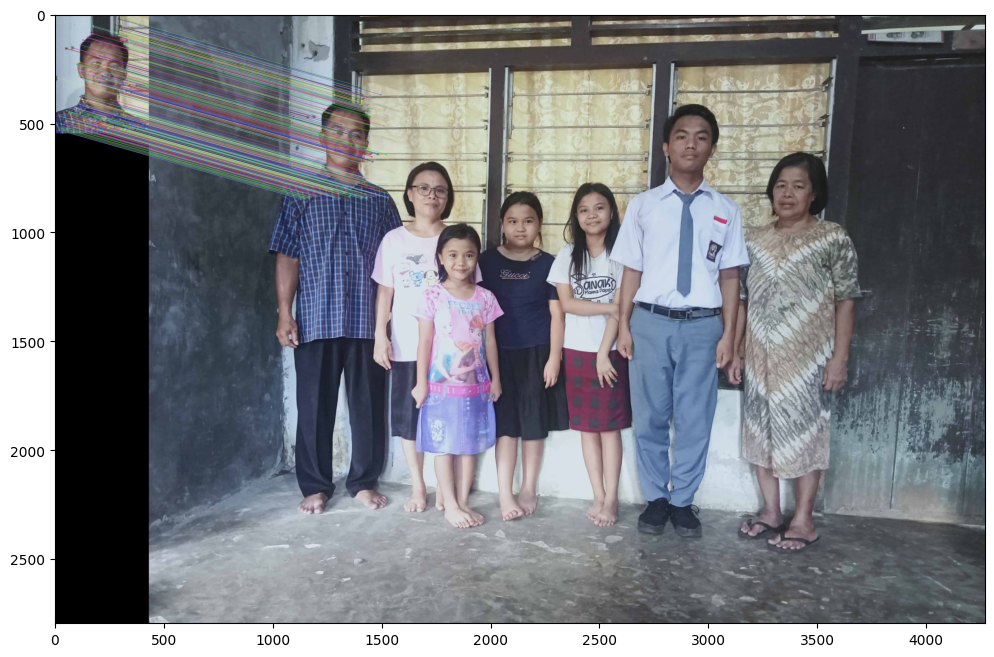

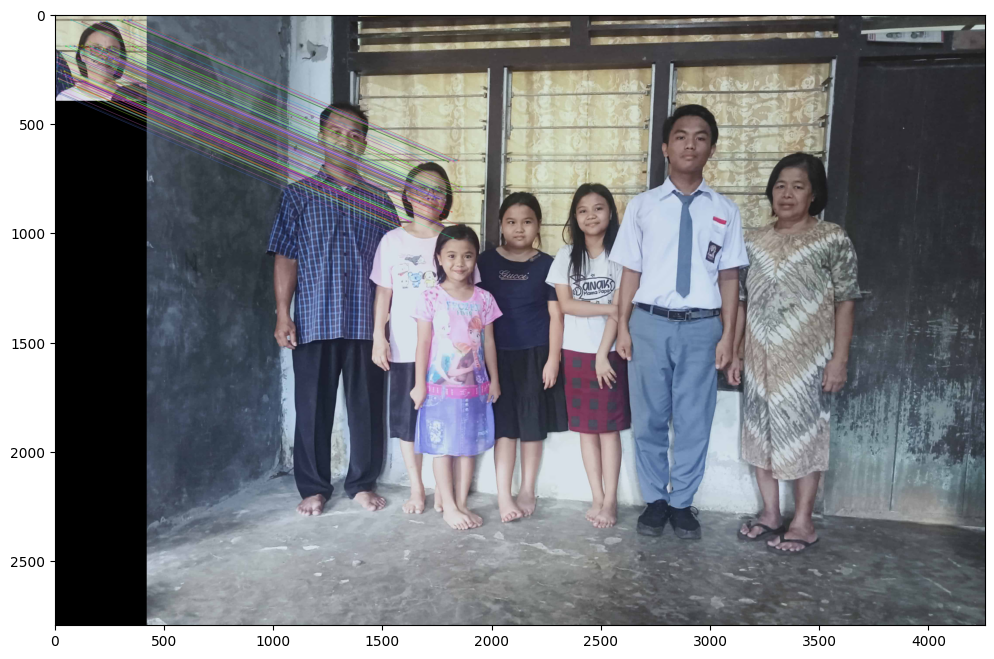

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Inisialisasi counter
counter = 1

# Loop untuk setiap path gambar
for gambar_path in daftar_gambar:
    # Gunakan gambar dari path
    img1 = cv2.imread(gambar_path)
    if img1 is None:
        print("Gambar tidak ditemukan:", gambar_path)
        continue

    # Gunakan gambar dari eLOK
    img2 = cv2.imread(family)          # gambar yang dituju
    gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

    # Menggunakan Detector SIFT
    sift = cv2.xfeatures2d.SIFT_create()

    # Mencari Keypoint dengan SIFT
    kp1, des1 = sift.detectAndCompute(gray1,None)
    kp2, des2 = sift.detectAndCompute(gray2,None)

    # Melakukan Matching dari hasil deteksi keypoints menggunakan
    # BruteForce Matcher
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)

    # Uji rasio matching sederhana
    good = []
    for m,n in matches:
        if m.distance < 0.5*n.distance:
            good.append([m])
    img3 = None

    # menggambar hasil match pada gambar baru (IMG3)
    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)

    # Simpan hasil dengan penomoran yang berbeda
    nama_file = f'./img-output/feature-detection-{counter}.png'
    cv2.imwrite(nama_file, img3)

    # Tampilkan hasil
    plt.figure(figsize=(12, 12))
    plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)),plt.show()

    # Tingkatkan counter
    counter += 1


**Template Matching**

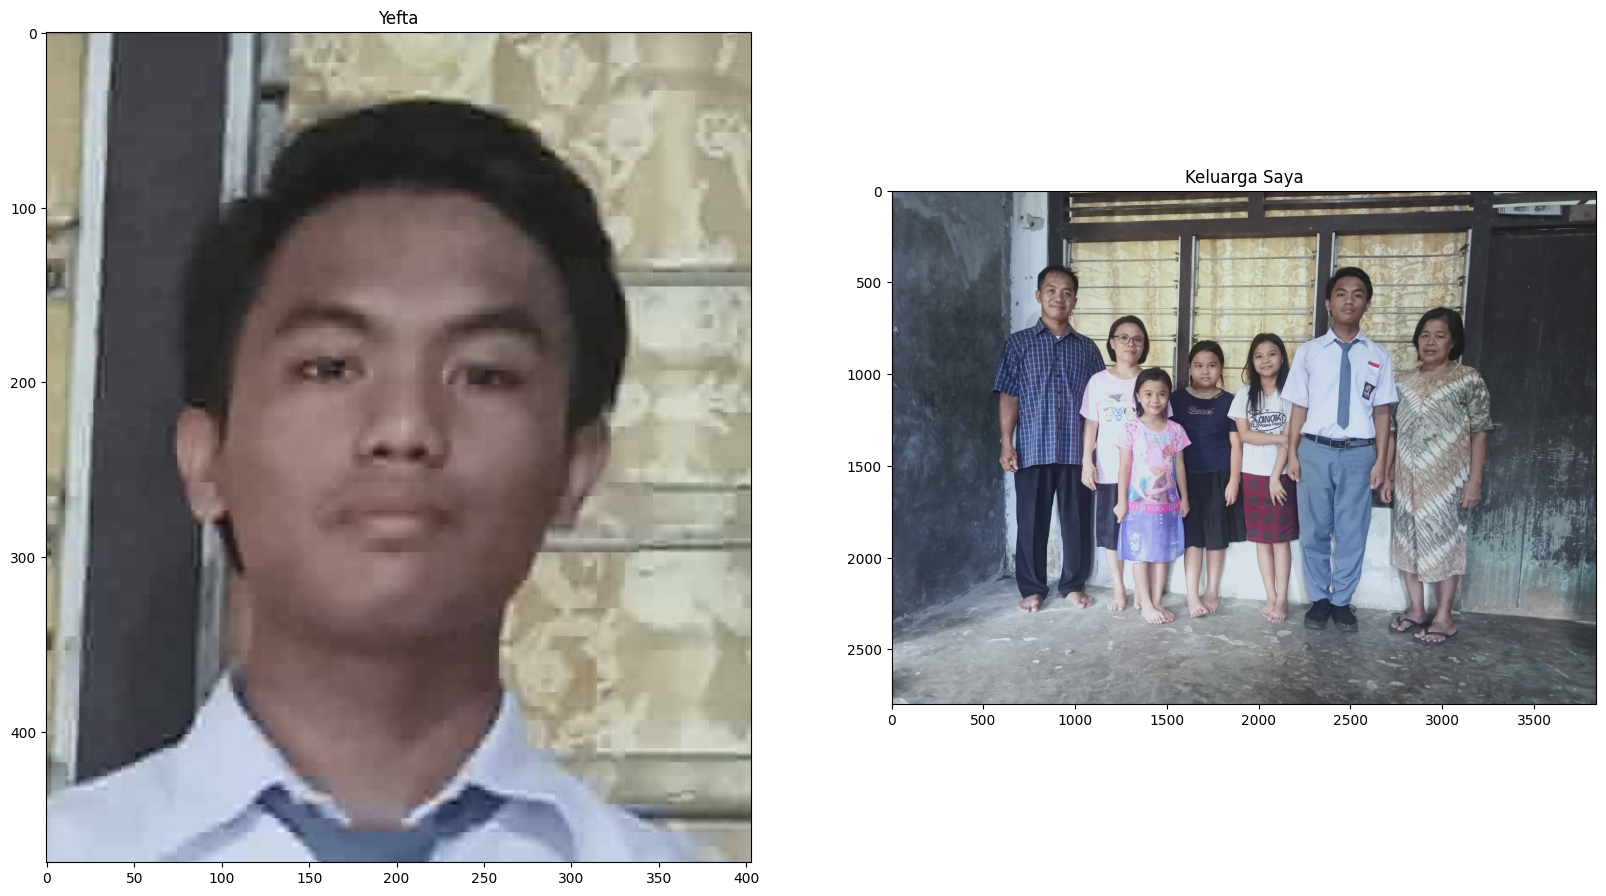

In [ ]:
import os
from matplotlib import pyplot as plt
import cv2

# panggil dan konversi warna agar sesuai dengan Matplotlib
yefta = cv2.imread(saya)
yefta = cv2.cvtColor(yefta, cv2.COLOR_BGR2RGB)  # simpan dengan nama yang sama = ditumpuk

# panggil dan konversi warna agar sesuai dengan Matplotlib
keluarga = cv2.imread(family)
keluarga = cv2.cvtColor(keluarga, cv2.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(yefta), plt.title('Yefta')
plt.subplot(122), plt.imshow(keluarga), plt.title('Keluarga Saya')

# Buat direktori jika belum ada
output_dir = './img-output/'
os.makedirs(output_dir, exist_ok=True)

plt.savefig(output_dir + 'template-matching.png')
plt.show()
